In [1]:
#import libray for reading file
import pandas as pd
df=pd.read_csv("loan_approval_processed 1.csv")
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [2]:
#removing non using columns
df.drop([" no_of_dependents"," loan_term"," residential_assets_value"," commercial_assets_value"," luxury_assets_value"," bank_asset_value"],axis=1,inplace=True)

In [3]:
#information about the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   education       4269 non-null   int64
 1    self_employed  4269 non-null   int64
 2    income_annum   4269 non-null   int64
 3    loan_amount    4269 non-null   int64
 4    cibil_score    4269 non-null   int64
 5    loan_status    4269 non-null   int64
dtypes: int64(6)
memory usage: 200.2 KB


In [4]:
#separating the target variable and input variable 
x=df.drop([" loan_status"],axis=1)
y=df[" loan_status"]

In [5]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2) 

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.6314176085791777

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
score = regressor.score(x_test, y_test)
score

0.7113955952687803

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor() 
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.score(x_test,y_test)
y_pred

0.8528777901881605

In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7459016393442623

In [10]:
from sklearn.svm import SVC
s=SVC()
s.fit(x_train, y_train)
s.score(x_test,y_test)

0.6030444964871194

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x_train,y_train)

array([0.82429921, 0.82674438, 0.78309551, 0.79586593, 0.73901756])

In [12]:
#Since RandomForestRegressor have a best score 

<Axes: >

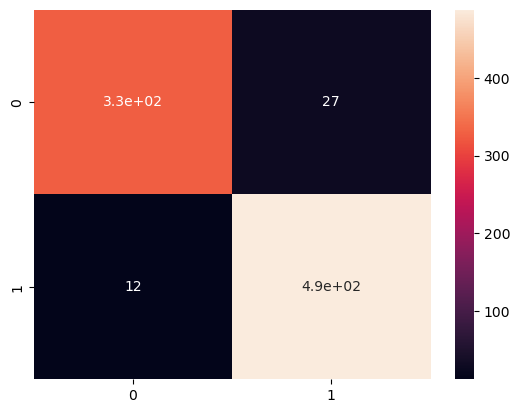

In [13]:
y=rf_regressor.predict(x_test).round()
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y,y_test)
sns.heatmap(result,annot=True) # to display the predict of RandomForestRegressor for 0 and 1

In [15]:
import pickle
with open("rf_regressor.pickle","wb") as f:
    pickle.dump(rf_regressor,f)